# NAME: ANSER GHAFFAR
# ROLL NO: SU92-BSDSM-F23-032
# SECTION: BSDS 3A
# AI PROJECT


# Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Loading

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Axes(0.125,0.11;0.775x0.77)


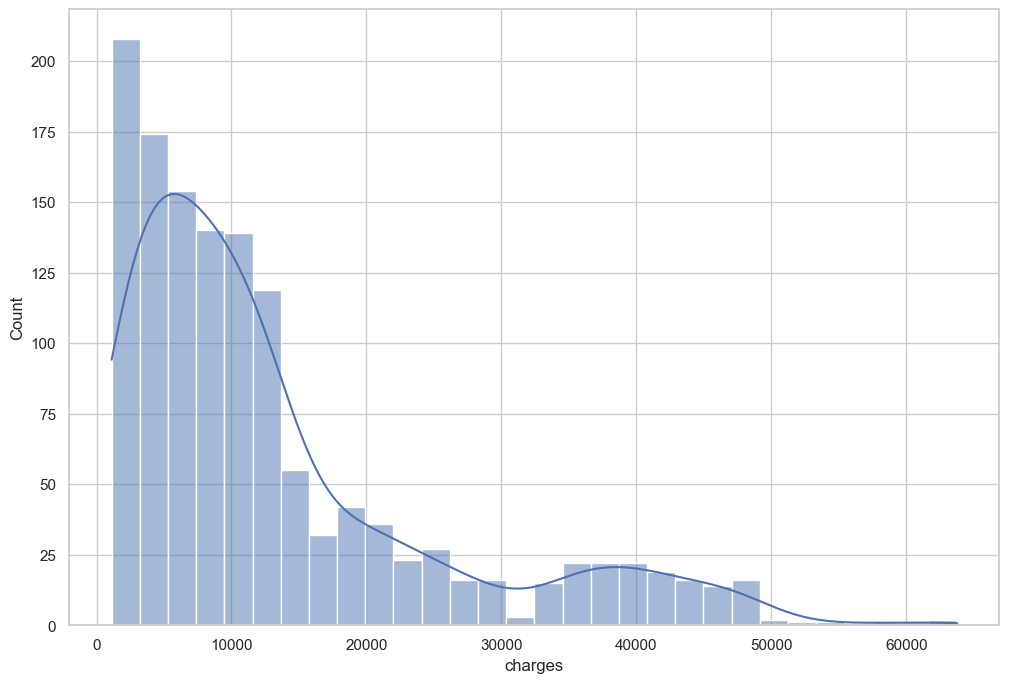

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(df['charges'], kde=True) #
print(ax)
plt.show()  # This line will display the plot
# KDE stands for Kernel Density Estimation used to represent the underlying distribution of data without assuming any specific parametric form (e.g., normal distribution).
#KDE provides a smooth curve that represents the data's density, unlike a histogram which is blocky and depends on bin sizes.


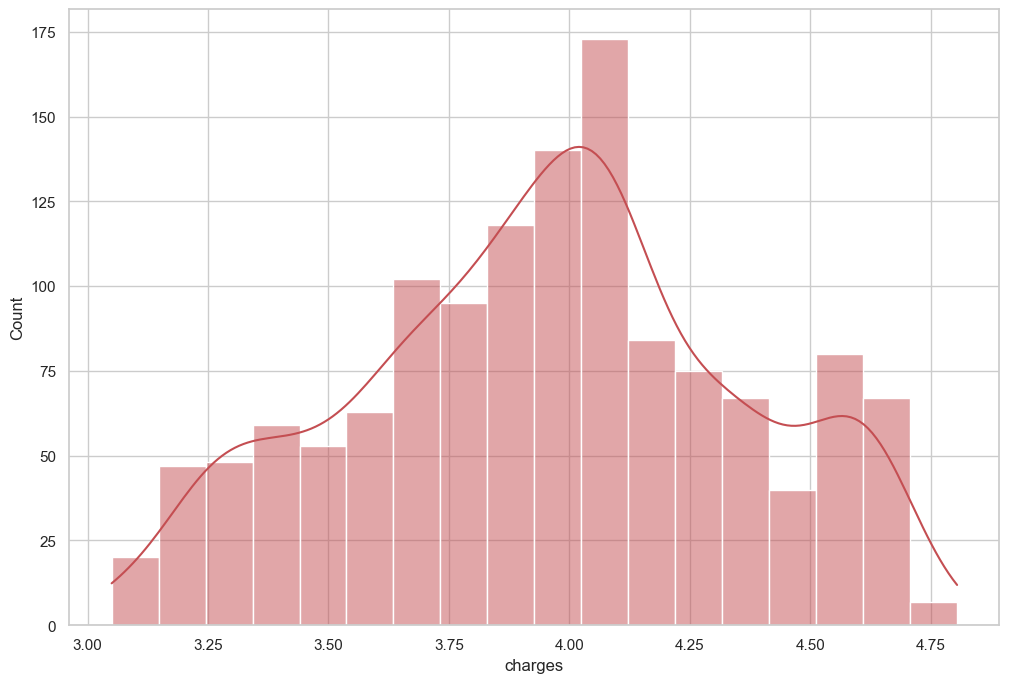

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.histplot(np.log10(df['charges']), kde = True, color = 'r' )

Text(0.5, 1.0, 'Total Charges by Region')

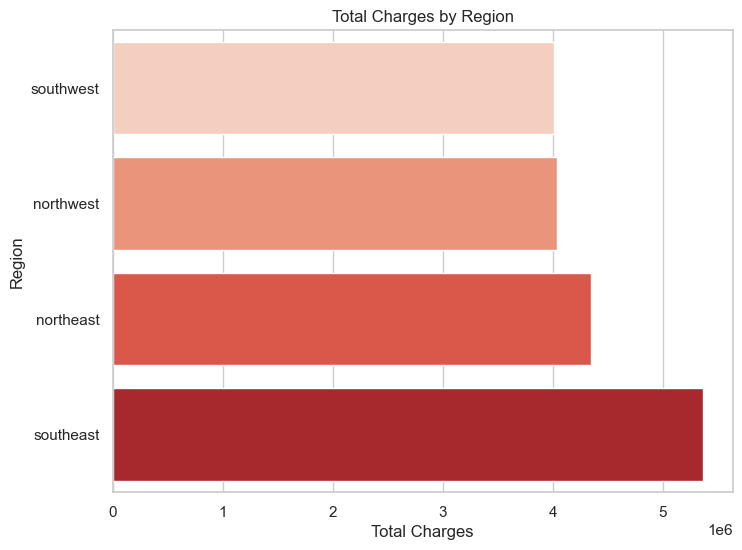

In [9]:
# Grouping the charges by region, summing them, and sorting the values
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

# Creating a bar plot
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Correctly specifying x and y parameters for the barplot
# Using .reset_index() to convert the Series to a DataFrame for easier plotting
charges_df = charges.head().reset_index()

# Now using the DataFrame columns for plotting
ax = sns.barplot(x='charges', y='region', data=charges_df, palette='Reds')

# Adding labels for clarity (optional)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Region')
ax.set_title('Total Charges by Region')

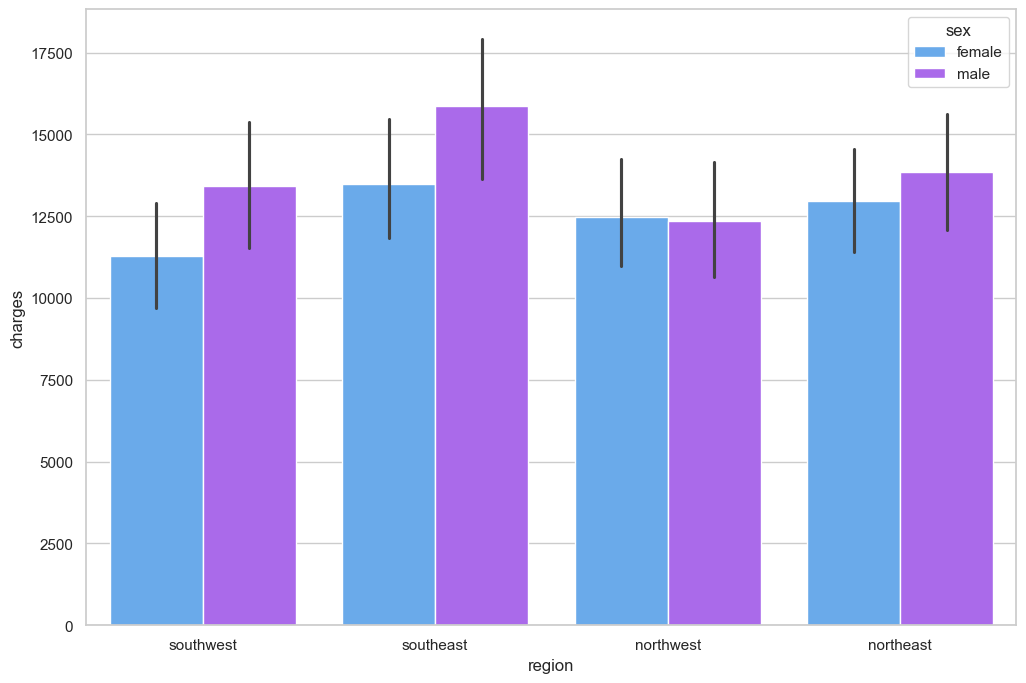

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

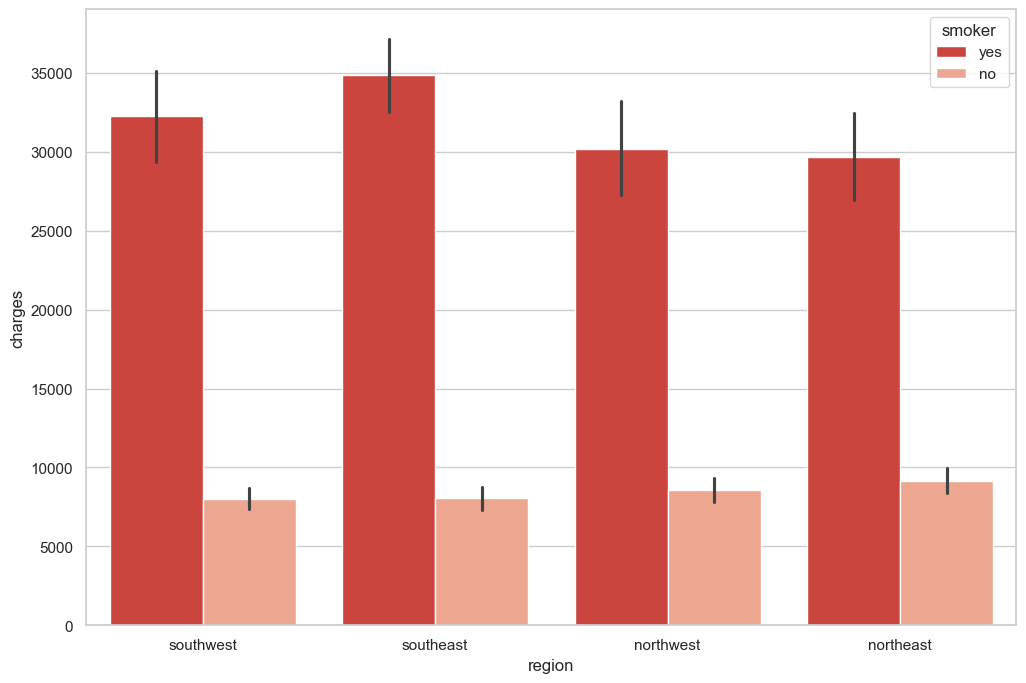

In [11]:
f,ax = plt.subplots(1,1,figsize = (12,8))
ax = sns.barplot(x = 'region',y = 'charges', hue = 'smoker',data = df, palette = 'Reds_r')

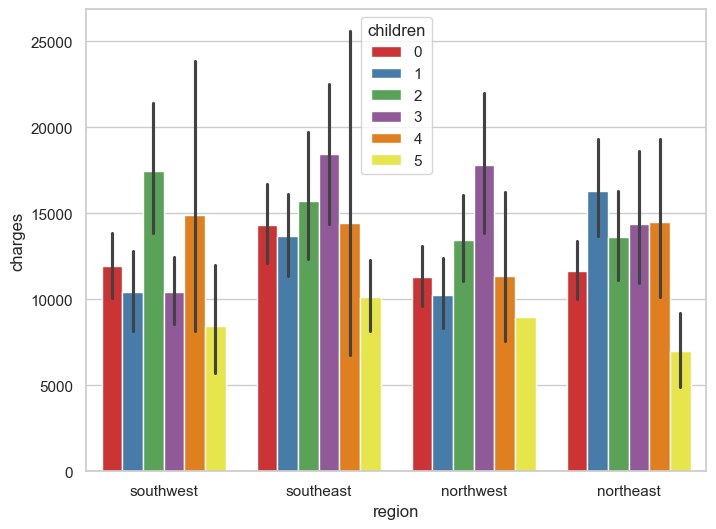

In [12]:
f,ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.barplot( x= 'region', y = 'charges', hue = 'children', data = df, palette= 'Set1')

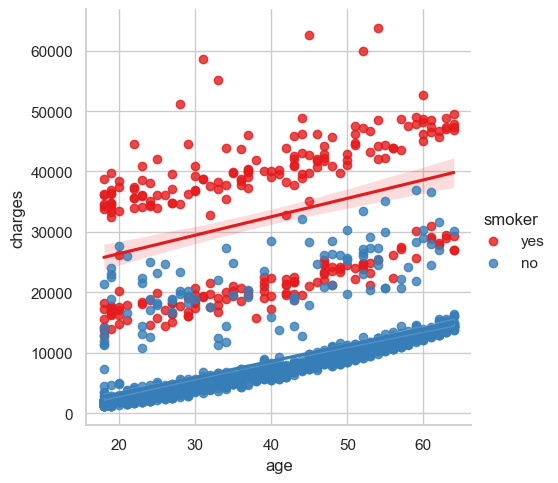

In [13]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker',palette = 'Set1') # create a scatter plot with linear egression line using 'lmplot() function linear model plot

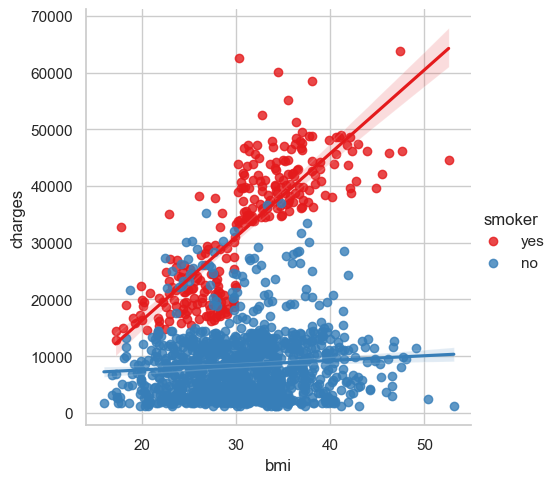

In [14]:
ax = sns.lmplot(x = 'bmi',y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.show()

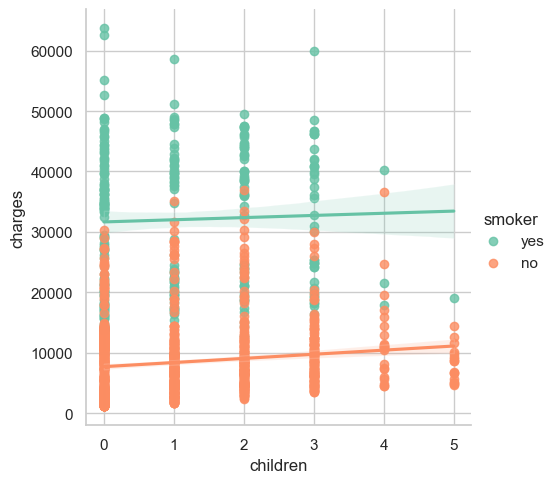

In [15]:
ax = sns.lmplot(x = 'children', y = 'charges', hue = 'smoker', data = df, palette = 'Set2')

Text(63.625, 0.5, 'Charges')

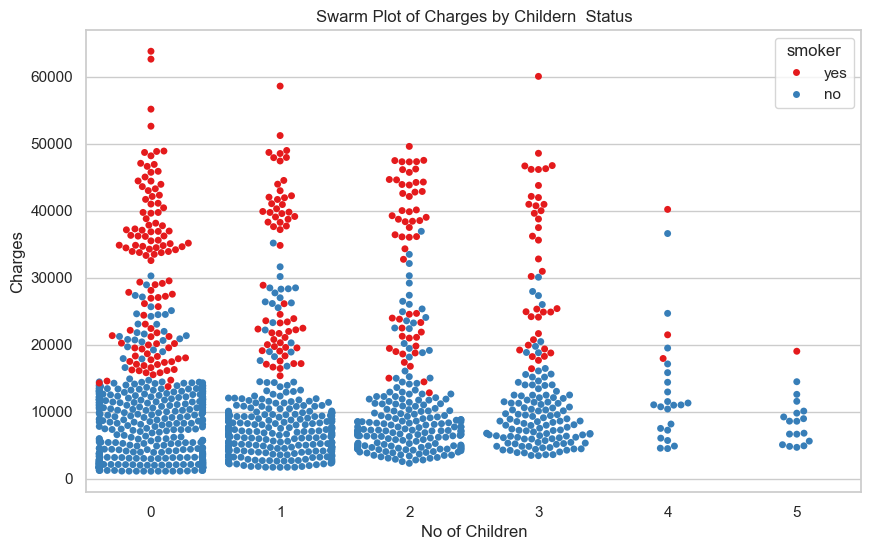

In [16]:
# Create a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='children', y='charges', data=df,hue='smoker', palette='Set1')
plt.title('Swarm Plot of Charges by Childern  Status')
plt.xlabel('No of Children')
plt.ylabel('Charges')


In [17]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [18]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [19]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [20]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

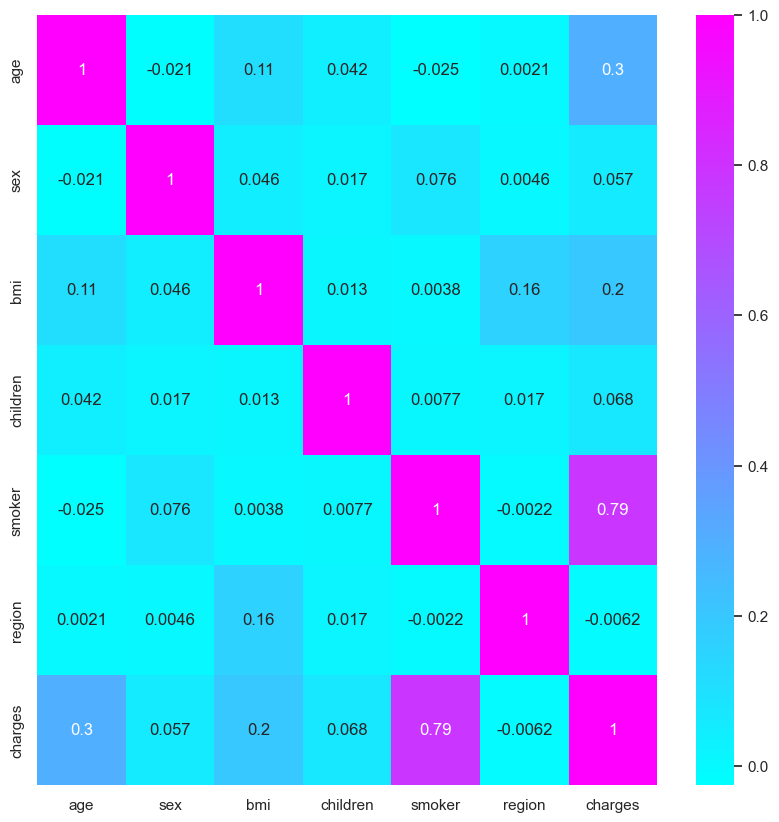

In [21]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

# Linear Regression

In [22]:
from sklearn.model_selection import train_test_split as holdout #holdout function is used to split the dataset into training and testing subset 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [23]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test)) #this line calculates and prints the R² score (coefficient of determination) of the model on the test data.
##The R² score indicates how well the model explains the variance in the target variable, with values closer to 1 indicating a better fit.

-11661.983908824399
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996


In [24]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


# Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


# Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'df' is a DataFrame with a 'charges' column as the target variable
x = df.drop(['charges'], axis=1)
y = df['charges']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initialize the Random Forest Regressor
Rfr = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',  # Use 'squared_error' for recent sklearn versions
    random_state=1,
    n_jobs=-1
)

# Fit the model on the training data
Rfr.fit(x_train, y_train)

# Make predictions on both training and test sets
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Calculate and display performance metrics
print('MSE train data: %.3f, MSE test data: %.3f' % (
    mean_squared_error(y_train, x_train_pred), 
    mean_squared_error(y_test, x_test_pred)
))
print('R2 train data: %.3f, R2 test data: %.3f' % (
    r2_score(y_train, x_train_pred),
    r2_score(y_test, x_test_pred)
))


MSE train data: 3472558.404, MSE test data: 21690404.802
R2 train data: 0.976, R2 test data: 0.855


    Feature  Importance
4    smoker    0.617874
2       bmi    0.210180
0       age    0.131637
3  children    0.018368
5    region    0.015145
1       sex    0.006795


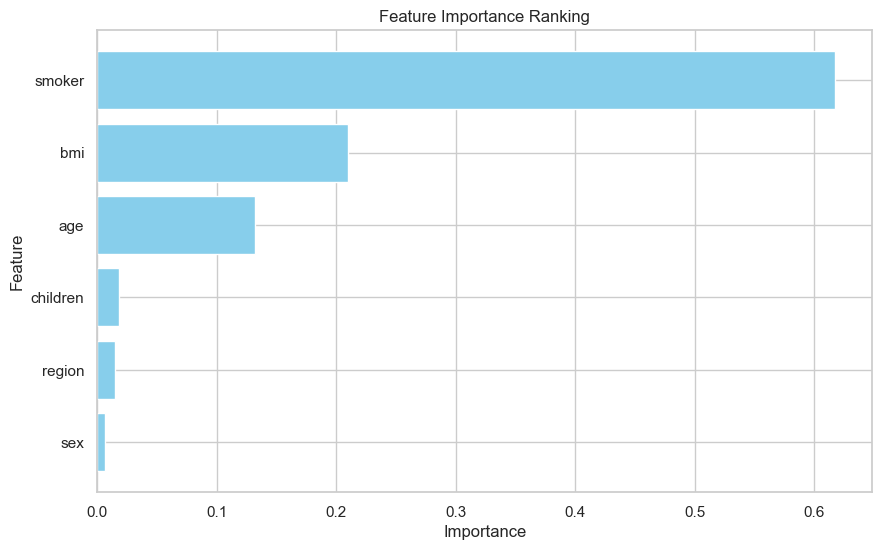

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores from the trained model
feature_importances = Rfr.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance rankings
print(feature_importance_df)

# Plot the feature importances for visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.show()

# Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705253518
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345231


In [29]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776445
Mean Squared Error: 18895160.09878035
Root Mean Squared Error: 4346.856346692441


In [30]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


### 
Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model